# TF-IDF TOY

In [100]:
from konlpy.tag import Twitter
#from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import nltk
#import pandas as pd
import matplotlib.pyplot as plt
import re

In [101]:
kor_corpus = pd.read_csv('C:\\Users\\user\\downloads\\news_koreanwave.csv', encoding='utf-8')
kor_corpus

,time,title,contents
0,2016/08/09 16:44,에스테틱 미용 시장 개척하는 광주 노아 메디컬,(광주=연합뉴스) 여운창 기자 = 날로 커가는 피부·미용분야의 에스테틱 시장을 개척...
1,2016/08/09 15:37,청소년 노래·춤 경연 'LG드림페스티벌'…총상금 5천만원,(구미=연합뉴스) 박순기 기자 = 노래·춤 경연으로 청소년 꿈과 열정을 키워주는 '...
2,2016/08/09 15:32,"고신대병원, 카자흐스탄에 두 번째 거점센터",(부산=연합뉴스) 박창수 기자 = 고신대 복음병원은 카자흐스탄 제2 도시 알마티에 ...
3,2016/08/09 15:19,국제패션문화페스티벌 자원봉사자 모집,(대구=연합뉴스) 한국패션문화산업진흥원은 2016 대구국제패션문화페스티벌 자원봉사...
4,2016/08/09 14:42,"""中한류 일정 대부분 정상 진행…좋은 콘텐츠로 다가가야""",(세종=연합뉴스) 김영만 기자 = 한국의 고고도 미사일 방어체계(THAAD·사드) ...
...,...,...,...
2585,2015/08/25 06:25,부산전통시장 특화사업 박차…12개 시장 대상,(부산=연합뉴스) 신정훈 기자 = 부산시가 글로벌 명품시장으로 선정된 국제시장을 비...
2586,2015/08/24 17:06,"김종덕 ""현대미술관 법인화 재추진…위상·체계 일신""(종합)",(서울=연합뉴스) 김중배 기자 = 김종덕 문화체육관광부 장관은 24일 국립현대미술관...
2587,2015/08/24 16:47,아이유 '마음' 들려주는 대북확성기 하루 8시간 방송,(서울=연합뉴스) 이영재 기자 = 한반도 긴장 해소를 위해 열린 남북 고위급접촉의 ...
2588,2015/08/24 16:47,"김종덕 문체부장관 취임 1년…""문화융성 구체화 성과""(종합)",(서울=연합뉴스) 김중배 기자 = 김종덕 문화체육관광부 장관이 지난 21일로 취임 ...


In [102]:
pos_tagger = Twitter()

In [103]:
stopword = ['것','수','저']
total_news = []

for news in kor_corpus['contents'].head():
    pos_news = ['/'.join(t[:-1]) for t in pos_tagger.pos(news) if ((t[1]=='Noun') & (t[0] not in stopword))]
    total_news.append(' '.join(pos_news))

In [104]:
total_news

['광주 연합뉴스 여운 창 기자 날로 피부 미용 분야 에스테 시장 개척 광주 지역 업체 눈길 끌 노아 컬 설립 에스테 기업 에스테 화장품 미용 기기 건강 기기 식품 등 제품군 보유 액 추물 사용 캐비어 앰플 태반 앰플 셀룰라이트 오일 카페인 성분 함유 다이어트 용 슬 리밍 크림 등 호응 전체 기사 본문 배너 노아 컬 전 화장품 회사 근무 이한수 대표 프랑스 화장품 단일 브랜드 취급 사업 초기 박대 투자 실패 현재 개 제품 브랜드 직접 제조 유통 자산 규모 연매출 견실 중소기업 광주 전남 지역 에스테 분야 현재 여종 관련 분야 특허 외 의장 등록 상표 등록 보유 지역 업체 선도 개발 테라 피 션 시장 반응 업체 설명 전통 온돌방 착안 테라 신체 물리 순환 시스템 해 복부 지방 분해 몸 독소 제거 효과 션 기도 세라믹 코팅 접목 기존 일반 션기 음이온 발생 원적외선 기능 노아 컬 지역 대학 협의 다음 달 신제품 출시 기존 제품 중국 시장 진출 계획 이한수 대표 광주 상의 제품 브리핑 국내 에스테 시장 세계 시장 영역 에스테 한류 문화 고 말',
 '구미 연합뉴스 박순 기 기자 노래 춤 경연 청소년 꿈 열정 제 드림 페스티벌 이 시작 경북 협의 회 내달 홈페이지 신청 행사 전체 기사 본문 배너 가요 그룹 댄스 국악 등 개 부문 진행 부분 별 대상 금 은상 동상 수여 총상 금은 경북 협의 회장 여성가족부 장관 경북 도지사 경북 교육감 구미시장 세 세 누구 참가 가요 그룹 댄스 부문 경우 내달 서울 지역 예선 서울 경향 아트 힐 부산 지역 예선 부산 디자인 센터 구미 지역 예선 경운대 학교 이 각각 린다 본선 팀 선발 뒤 구미 시민운동 행사 대상 팀 선정 국악 부문 구미 경운대 당일 행사 진행 드림 페스티벌 통해 의 김태우 십센치 의 권정열 한류 스타 황 치열 팝핀 여제 민정 트로트 가수 류 원정 등 스타 발굴 내용 홈페이지 사무국 문의',
 '부산 연합뉴스 박창수 기자 고신대 복음병원 카자흐스탄 제 도시 알마티 수도 아스타나 두 거점 센터 마련 고신대 병원 알마티 헬

In [105]:
#BOW
kor_vectorizer = CountVectorizer(min_df=2) 
kor_bow = kor_vectorizer.fit_transform(total_news)
print(kor_bow)

  (0, 22)	1
  (0, 5)	1
  (0, 16)	3
  (0, 21)	5
  (0, 28)	4
  (0, 25)	1
  (0, 4)	1
  (0, 13)	1
  (0, 12)	1
  (0, 36)	2
  (0, 24)	1
  (0, 1)	1
  (0, 18)	1
  (0, 26)	1
  (0, 20)	1
  (0, 10)	1
  (0, 38)	1
  (0, 27)	1
  (0, 29)	1
  (0, 3)	1
  (0, 34)	1
  (0, 8)	1
  (1, 22)	1
  (1, 5)	1
  (1, 28)	3
  :	:
  (4, 21)	1
  (4, 25)	1
  (4, 4)	1
  (4, 13)	1
  (4, 12)	1
  (4, 24)	1
  (4, 1)	1
  (4, 18)	1
  (4, 10)	1
  (4, 27)	11
  (4, 29)	1
  (4, 3)	1
  (4, 34)	5
  (4, 8)	7
  (4, 35)	1
  (4, 14)	2
  (4, 30)	1
  (4, 0)	1
  (4, 17)	1
  (4, 11)	1
  (4, 31)	1
  (4, 37)	3
  (4, 33)	5
  (4, 23)	2
  (4, 9)	1


In [106]:
print(kor_vectorizer.get_feature_names())
print(kor_bow.shape)
print(kor_bow.toarray())

['각각', '관련', '교육', '국내', '기사', '기자', '누구', '도시', '문화', '미래', '발생', '발전', '배너', '본문', '부문', '부산', '분야', '산업', '선도', '센터', '시스템', '시장', '연합뉴스', '예술', '유통', '전체', '전통', '중국', '지역', '진출', '진행', '최근', '페스티벌', '한국', '한류', '행사', '현재', '협력', '협의']
(5, 39)
[[ 0  1  0  1  1  1  0  0  1  0  1  0  1  1  0  0  3  0  1  0  1  5  1  0
   1  1  1  1  4  1  0  0  0  0  1  0  2  0  1]
 [ 1  0  0  0  1  1  1  0  0  0  0  0  1  1  3  2  0  0  0  1  0  0  1  0
   0  1  0  0  3  0  2  0  2  0  1  3  0  0  2]
 [ 0  1  1  0  1  1  0  1  0  0  0  1  1  1  0  1  0  1  0  2  1  0  1  0
   0  1  0  1  0  1  1  1  0  0  1  0  0  1  0]
 [ 0  0  1  0  1  0  1  1  4  1  0  0  1  1  1  0  0  1  0  0  0  0  2  2
   0  1  1  0  0  0  0  0  1  2  1  2  1  0  0]
 [ 1  1  0  1  1  1  0  0  7  1  1  1  1  1  2  0  1  1  1  0  0  1  2  2
   1  1  0 11  0  1  1  1  0  5  5  1  0  3  0]]


In [107]:
#TF-IDF
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(kor_bow.toarray())
print(tfidf)

  (0, 38)	0.12277863246492705
  (0, 36)	0.2455572649298541
  (0, 34)	0.07251503819314904
  (0, 29)	0.10191735599360188
  (0, 28)	0.4911145298597082
  (0, 27)	0.10191735599360188
  (0, 26)	0.12277863246492705
  (0, 25)	0.07251503819314904
  (0, 24)	0.12277863246492705
  (0, 22)	0.07251503819314904
  (0, 21)	0.6138931623246353
  (0, 20)	0.12277863246492705
  (0, 18)	0.12277863246492705
  (0, 16)	0.3683358973947812
  (0, 13)	0.07251503819314904
  (0, 12)	0.07251503819314904
  (0, 10)	0.12277863246492705
  (0, 8)	0.10191735599360188
  (0, 5)	0.08573609284749706
  (0, 4)	0.07251503819314904
  (0, 3)	0.12277863246492705
  (0, 1)	0.10191735599360188
  (1, 38)	0.30956754156246924
  (1, 35)	0.3854535358157575
  (1, 34)	0.09141778845832271
  :	:
  (4, 33)	0.36926889968952514
  (4, 31)	0.07385377993790503
  (4, 30)	0.06130530883339784
  (4, 29)	0.06130530883339784
  (4, 27)	0.6743583971673762
  (4, 25)	0.043619232152919296
  (4, 24)	0.07385377993790503
  (4, 23)	0.14770755987581005
  (4, 22)	0.08

In [108]:
tfidf.toarray()

array([[0.        , 0.10191736, 0.        , 0.12277863, 0.07251504,
        0.08573609, 0.        , 0.        , 0.10191736, 0.        ,
        0.12277863, 0.        , 0.07251504, 0.07251504, 0.        ,
        0.        , 0.3683359 , 0.        , 0.12277863, 0.        ,
        0.12277863, 0.61389316, 0.07251504, 0.        , 0.12277863,
        0.07251504, 0.12277863, 0.10191736, 0.49111453, 0.10191736,
        0.        , 0.        , 0.        , 0.        , 0.07251504,
        0.        , 0.24555726, 0.        , 0.12277863],
       [0.15478377, 0.        , 0.        , 0.        , 0.09141779,
        0.10808522, 0.15478377, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.09141779, 0.09141779, 0.38545354,
        0.30956754, 0.        , 0.        , 0.        , 0.15478377,
        0.        , 0.        , 0.09141779, 0.        , 0.        ,
        0.09141779, 0.        , 0.        , 0.46435131, 0.        ,
        0.25696902, 0.        , 0.30956754, 0.        , 0.0

## 유사한 문서 찾기 예제

In [109]:
yonhap = kor_corpus['contents']

In [110]:
total_news = []
stopword = ['것','수','저']

for news in yonhap[:1000]:
    pos_news = re.sub('.* 기자 = ', '', news)
    pos_news = ['/'.join(t[:-1]) for t in pos_tagger.pos(pos_news) if ((t[1]=='Noun') & (t[0] not in stopword))]
    total_news.append(' '.join(pos_news))

In [111]:
kor_vectorizer = CountVectorizer(min_df=10)
kor_bow = kor_vectorizer.fit_transform(total_news)

In [113]:
cosine_similarity(kor_bow[0], kor_bow)

array([[1.        , 0.12173486, 0.06030633, 0.06818622, 0.16158773,
        0.10640966, 0.0758098 , 0.16440813, 0.04298012, 0.10527936,
        0.11098767, 0.08508637, 0.05065256, 0.10504686, 0.05860255,
        0.10252877, 0.13108813, 0.20904061, 0.18142591, 0.06008639,
        0.08061022, 0.4265352 , 0.12486552, 0.08023511, 0.0764091 ,
        0.0953109 , 0.06859413, 0.11930941, 0.08662264, 0.11129395,
        0.06113981, 0.12393213, 0.04990412, 0.05792563, 0.06057372,
        0.0796005 , 0.08456161, 0.14001477, 0.05835841, 0.07177136,
        0.14522525, 0.04548588, 0.09271934, 0.11080271, 0.09701017,
        0.18128431, 0.11371471, 0.12113809, 0.09403049, 0.10787924,
        0.07498126, 0.09475421, 0.12143068, 0.13243743, 0.08161283,
        0.11089333, 0.06384337, 0.20147507, 0.09319733, 0.07407103,
        0.09649767, 0.12467216, 0.1044966 , 0.07657052, 0.08213785,
        0.11760737, 0.09903127, 0.14698795, 0.13397784, 0.28123236,
        0.10296484, 0.27624495, 0.05792305, 0.10

In [114]:
(-cosine_similarity(kor_bow[0], kor_bow)).argsort()

array([[  0,  21, 604, 503, 883, 440, 498, 196, 723, 172, 416, 552, 685,
        877, 393, 740, 895, 264, 309,  69,  71, 417, 463, 770, 222, 287,
        369, 272, 487, 594, 271, 680, 737, 733,  97,  91, 671, 917, 232,
        800, 267, 587, 187, 349, 806, 712, 628, 261, 506, 553, 497, 363,
        665, 305, 891, 753, 427, 768, 964, 525, 471, 280, 933, 386, 676,
        850, 160, 765, 283, 682, 675, 849, 785, 228, 230, 154, 970,  17,
        747, 268, 161, 203, 642, 243, 554, 629, 906,  57, 724, 551, 643,
        491, 926, 492, 661, 184, 511, 759, 713, 958, 320, 882, 946, 382,
        687, 876, 202, 447, 752, 931, 560, 496, 389, 957, 255, 201, 634,
        360, 457, 567, 677, 558, 273, 218, 719, 973,  18,  45, 379, 582,
        708, 175, 584, 871, 532, 585, 887, 617, 916, 911, 913, 355, 938,
        354, 475, 215, 951, 306, 269, 907, 147, 784, 177, 884, 489, 181,
        779, 136, 997, 129, 144,   7, 343, 352, 975,  85, 337,   4, 823,
         99, 460, 683, 242, 104, 490, 426, 189, 376

In [115]:
idx = (-cosine_similarity(kor_bow[0], kor_bow)[0]).argsort()
print(idx)

[  0  21 604 503 883 440 498 196 723 172 416 552 685 877 393 740 895 264
 309  69  71 417 463 770 222 287 369 272 487 594 271 680 737 733  97  91
 671 917 232 800 267 587 187 349 806 712 628 261 506 553 497 363 665 305
 891 753 427 768 964 525 471 280 933 386 676 850 160 765 283 682 675 849
 785 228 230 154 970  17 747 268 161 203 642 243 554 629 906  57 724 551
 643 491 926 492 661 184 511 759 713 958 320 882 946 382 687 876 202 447
 752 931 560 496 389 957 255 201 634 360 457 567 677 558 273 218 719 973
  18  45 379 582 708 175 584 871 532 585 887 617 916 911 913 355 938 354
 475 215 951 306 269 907 147 784 177 884 489 181 779 136 997 129 144   7
 343 352 975  85 337   4 823  99 460 683 242 104 490 426 189 376 974 405
 388 515 942 641 912 378 778 472 788 274 128 493 346 890 944 149 152 356
 864 624 536 134 648 289 873 420 290  67 994 780 178 336 889  40 614 234
 365 572 711 456 739 561 763 610 530 302 125 270 736 291 971 573  37 881
 259 213 844 399 959 481 444 904 167 987 742 855  8

In [116]:
#BOW
def find_most_similar_news(index, bow, corpus):
    idx = (-cosine_similarity(bow[index], bow)[0]).argsort()[1]
    return corpus[idx]

#TF-IDF
def find_most_similar_news_idf(index, tfidf, corpus):
    idx = (-cosine_similarity(tfidf[index], tfidf)[0]).argsort()[1]
    return corpus[idx]

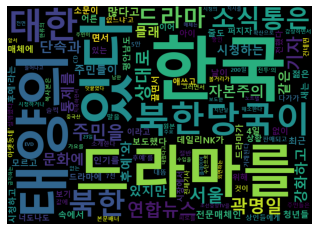

In [130]:
idx = 300

obj = yonhap[idx]
wordcloud = WordCloud(font_path = "C:\\windows\\Fonts\\malgunbd.ttf", width=700, height=500).generate(obj)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

요약: 북한에서의 한국 드라마 유행

키워드: 북한, 한국, 드라마

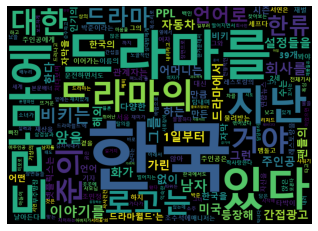

In [134]:
bow_result = find_most_similar_news(idx, kor_bow, yonhap)
wordcloud = WordCloud(font_path = "C:\\windows\\Fonts\\malgunbd.ttf", width=700, height=500).generate(bow_result)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

요약: 드라마 소개

키워드: 한국, 드라마

In [132]:
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(kor_bow.toarray())

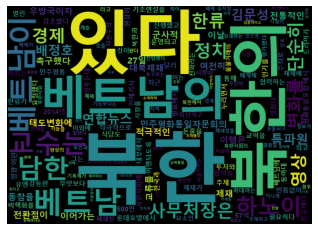

In [133]:
tfidf_result = find_most_similar_news_idf(idx, tfidf, yonhap)
wordcloud = WordCloud(font_path = "C:\\windows\\Fonts\\malgunbd.ttf", width=700, height=500).generate(tfidf_result)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

요약: 베트남의 북한 제재 참여 요구

키워드: 북한, 베트남, 남한

키워드만 보면 대상과 비슷한 문서는 bow를 이용한 것 같지만,

tfidf에서 찾아낸 문서 중간에 대상과 거의 유사한 문장이 있는 것을 보아,

tfidf가 찾아낸 문서가 더 유사한 문서임을 알 수 있음.

# LSA

In [141]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
from gensim.test.utils import common_dictionary, common_corpus
from gensim.models import LsiModel

In [142]:
#SVD
X = sparse_random_matrix(100, 100, density=0.01, random_state=42)
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(X)  
TruncatedSVD(algorithm='randomized', n_components=5, n_iter=7,
        random_state=42, tol=0.0)

TruncatedSVD(n_components=5, n_iter=7, random_state=42)

In [143]:
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)

[0.06063696 0.05842599 0.04970872 0.04344233 0.03723615]
0.24945013828489498
[2.58418571 2.52453902 2.32011672 2.17531753 2.04439905]


In [144]:
#LSA(Gensim - LSI=LSA)
model = LsiModel(common_corpus, id2word=common_dictionary)
vectorized_corpus = model[common_corpus] 

In [145]:
vectorized_corpus.corpus

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]